In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Importing the games data from season 2003 to 2021

Games = pd.read_csv('games.csv')
Games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [3]:
# Keeping necessary columns and adding the total games played column

Games = Games[['GAME_ID','HOME_TEAM_ID','VISITOR_TEAM_ID', 'SEASON', 'PTS_home','PTS_away','HOME_TEAM_WINS']]
Games['VISITOR_TEAM_WINS'] = np.where(Games['HOME_TEAM_WINS'] == 1, 0, 1)
Games['GAMES'] = 1

# Check whether there is a missing value or not

Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 9 columns):
GAME_ID              25796 non-null int64
HOME_TEAM_ID         25796 non-null int64
VISITOR_TEAM_ID      25796 non-null int64
SEASON               25796 non-null int64
PTS_home             25697 non-null float64
PTS_away             25697 non-null float64
HOME_TEAM_WINS       25796 non-null int64
VISITOR_TEAM_WINS    25796 non-null int32
GAMES                25796 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 1.7 MB


In [4]:
# Check the unique values of the columns

print(Games.nunique())

GAME_ID              25767
HOME_TEAM_ID            30
VISITOR_TEAM_ID         30
SEASON                  19
PTS_home               100
PTS_away               106
HOME_TEAM_WINS           2
VISITOR_TEAM_WINS        2
GAMES                    1
dtype: int64


In [5]:
# Dropping the double counted games from the dataframe

Games = Games.drop_duplicates(subset=['GAME_ID']).reset_index()
Games

,index,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,PTS_away,HOME_TEAM_WINS,VISITOR_TEAM_WINS,GAMES
0,0,22101005,1610612748,1610612750,2021,104.0,113.0,0,1,1
1,1,22101006,1610612741,1610612739,2021,101.0,91.0,1,0,1
2,2,22101007,1610612759,1610612754,2021,108.0,119.0,0,1,1
3,3,22101008,1610612744,1610612749,2021,122.0,109.0,1,0,1
4,4,22101009,1610612743,1610612761,2021,115.0,127.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
25762,25791,11400007,1610612737,1610612740,2014,93.0,87.0,1,0,1
25763,25792,11400004,1610612741,1610612764,2014,81.0,85.0,0,1,1
25764,25793,11400005,1610612747,1610612743,2014,98.0,95.0,1,0,1
25765,25794,11400002,1610612761,1610612758,2014,99.0,94.0,1,0,1


In [6]:
# Importing team data 

Teams = pd.read_csv('teams.csv')

# Check whether there is a missing value or not

Teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
LEAGUE_ID             30 non-null int64
TEAM_ID               30 non-null int64
MIN_YEAR              30 non-null int64
MAX_YEAR              30 non-null int64
ABBREVIATION          30 non-null object
NICKNAME              30 non-null object
YEARFOUNDED           30 non-null int64
CITY                  30 non-null object
ARENA                 30 non-null object
ARENACAPACITY         26 non-null float64
OWNER                 30 non-null object
GENERALMANAGER        30 non-null object
HEADCOACH             30 non-null object
DLEAGUEAFFILIATION    30 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [7]:
# Check the unique values of the columns

print(Teams.nunique())

LEAGUE_ID              1
TEAM_ID               30
MIN_YEAR              15
MAX_YEAR               1
ABBREVIATION          30
NICKNAME              30
YEARFOUNDED           15
CITY                  29
ARENA                 29
ARENACAPACITY         24
OWNER                 30
GENERALMANAGER        30
HEADCOACH             30
DLEAGUEAFFILIATION    28
dtype: int64


In [8]:
# Creating team name with the nicknames of them and renaming for further use

Teams['Team_Name'] = Teams['CITY'] + [' '] +Teams['NICKNAME'] 
Teams = Teams.rename(columns = {'TEAM_ID':'Team_ID'})

# Keeping necessary columns

Teams = Teams[['Team_ID','Team_Name']]

In [9]:
# Calculating total points scored and allowed for each home team

Games_Home = Games.groupby('HOME_TEAM_ID')['PTS_home','PTS_away','HOME_TEAM_WINS','GAMES'].sum().reset_index()
Games_Home = Games_Home.rename(columns = {'HOME_TEAM_ID':'Team_ID'})

# Calculating total points scored and allowed for each visitor team

Games_Away = Games.groupby('VISITOR_TEAM_ID')['PTS_home','PTS_away','VISITOR_TEAM_WINS','GAMES'].sum().reset_index()
Games_Away = Games_Away.rename(columns = {'VISITOR_TEAM_ID':'Team_ID'})

# Merging dataframes of home and away teams on team id to obtain only one dataframe

NBA_Games = pd.merge(Games_Home,Games_Away,on = 'Team_ID')
NBA_Games

,Team_ID,PTS_home_x,PTS_away_x,HOME_TEAM_WINS,GAMES_x,PTS_home_y,PTS_away_y,VISITOR_TEAM_WINS,GAMES_y
0,1610612737,87345.0,86090.0,484,855,89310.0,85449.0,320,871
1,1610612738,92931.0,88894.0,581,913,89779.0,89717.0,430,898
2,1610612739,90064.0,87837.0,532,889,88792.0,85963.0,367,872
3,1610612740,83238.0,82237.0,443,820,86710.0,83412.0,316,846
4,1610612741,86981.0,85158.0,506,872,84824.0,82794.0,360,841
5,1610612742,91305.0,87232.0,570,875,89042.0,88504.0,432,879
6,1610612743,91453.0,86749.0,573,846,93276.0,91519.0,395,890
7,1610612744,94826.0,89757.0,578,871,92878.0,91783.0,404,876
8,1610612745,90764.0,86766.0,561,873,89828.0,89224.0,421,871
9,1610612746,90113.0,87509.0,521,874,88394.0,86613.0,371,855


In [10]:
# Computing the total points scored and allowed for each team

NBA_Games['Wins'] = NBA_Games['HOME_TEAM_WINS'] + NBA_Games['VISITOR_TEAM_WINS']
NBA_Games['Games'] = NBA_Games['GAMES_x'] + NBA_Games['GAMES_y']
NBA_Games['Pts_Scored'] = NBA_Games['PTS_home_x'] + NBA_Games['PTS_away_y']
NBA_Games['Pts_Allowed'] = NBA_Games['PTS_away_x'] + NBA_Games['PTS_home_y']
NBA_Games = NBA_Games [['Team_ID','Wins','Games','Pts_Scored', 'Pts_Allowed']]

NBA_Games['Winning_Percent'] = NBA_Games['Wins'] / NBA_Games['Games']
NBA_Games['Pythagorean_Exp'] = NBA_Games['Pts_Scored'] ** 2 / (NBA_Games['Pts_Scored'] ** 2 + NBA_Games['Pts_Allowed'] ** 2)
NBA_Games['Pythagorean_Morey'] = NBA_Games['Pts_Scored'] ** 13.91 / 
                                    (NBA_Games['Pts_Scored'] ** 13.91 + NBA_Games['Pts_Allowed'] ** 13.91)

NBA_Games = pd.merge(NBA_Games,Teams,on = 'Team_ID')
NBA_Games

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Team_ID,Wins,Games,Pts_Scored,Pts_Allowed,Winning_Percent,Pythagorean_Exp,Pythagorean_Hollinger,Team_Name
0,1610612737,804,1726,172794.0,175400.0,0.465817,0.492516,0.438565,Atlanta Hawks
1,1610612738,1011,1811,182648.0,178673.0,0.558255,0.511000,0.589780,Boston Celtics
2,1610612739,899,1761,176027.0,176629.0,0.510505,0.498293,0.485921,Cleveland Cavaliers
3,1610612740,759,1666,166650.0,168947.0,0.455582,0.493156,0.443771,New Orleans Pelicans
4,1610612741,866,1713,169775.0,169982.0,0.505546,0.499391,0.494974,Chicago Bulls
5,1610612742,1002,1754,179809.0,176274.0,0.571266,0.509926,0.581179,Dallas Mavericks
6,1610612743,968,1736,182972.0,180025.0,0.557604,0.508118,0.566582,Denver Nuggets
7,1610612744,982,1747,186609.0,182635.0,0.562106,0.510761,0.587872,Golden State Warriors
8,1610612745,982,1744,179988.0,176594.0,0.563073,0.509517,0.577888,Houston Rockets
9,1610612746,892,1729,176726.0,175903.0,0.515905,0.502334,0.519245,Los Angeles Clippers


In [11]:
# Sorting based on winning percentage

NBA_Games = NBA_Games.sort_values(by=['Winning_Percent'],ascending = False)
NBA_Games

,Team_ID,Wins,Games,Pts_Scored,Pts_Allowed,Winning_Percent,Pythagorean_Exp,Pythagorean_Hollinger,Team_Name
22,1610612759,1166,1820,184999.0,176620.0,0.640659,0.523158,0.682389,San Antonio Spurs
5,1610612742,1002,1754,179809.0,176274.0,0.571266,0.509926,0.581179,Dallas Mavericks
11,1610612748,1037,1829,182244.0,179012.0,0.566976,0.508946,0.573280,Miami Heat
8,1610612745,982,1744,179988.0,176594.0,0.563073,0.509517,0.577888,Houston Rockets
7,1610612744,982,1747,186609.0,182635.0,0.562106,0.510761,0.587872,Golden State Warriors
1,1610612738,1011,1811,182648.0,178673.0,0.558255,0.511000,0.589780,Boston Celtics
6,1610612743,968,1736,182972.0,180025.0,0.557604,0.508118,0.566582,Denver Nuggets
25,1610612762,925,1714,173111.0,170389.0,0.539673,0.507924,0.565007,Utah Jazz
23,1610612760,911,1735,178876.0,178025.0,0.525072,0.502384,0.519661,Oklahoma City Thunder
10,1610612747,929,1785,183471.0,183237.0,0.520448,0.500638,0.505264,Los Angeles Lakers


In [12]:
# Sorting based on pythagorean expectation

NBA_Games = NBA_Games.sort_values(by=['Pythagorean_Exp'],ascending = False)
NBA_Games

,Team_ID,Wins,Games,Pts_Scored,Pts_Allowed,Winning_Percent,Pythagorean_Exp,Pythagorean_Hollinger,Team_Name
22,1610612759,1166,1820,184999.0,176620.0,0.640659,0.523158,0.682389,San Antonio Spurs
1,1610612738,1011,1811,182648.0,178673.0,0.558255,0.511000,0.589780,Boston Celtics
7,1610612744,982,1747,186609.0,182635.0,0.562106,0.510761,0.587872,Golden State Warriors
5,1610612742,1002,1754,179809.0,176274.0,0.571266,0.509926,0.581179,Dallas Mavericks
8,1610612745,982,1744,179988.0,176594.0,0.563073,0.509517,0.577888,Houston Rockets
11,1610612748,1037,1829,182244.0,179012.0,0.566976,0.508946,0.573280,Miami Heat
6,1610612743,968,1736,182972.0,180025.0,0.557604,0.508118,0.566582,Denver Nuggets
25,1610612762,925,1714,173111.0,170389.0,0.539673,0.507924,0.565007,Utah Jazz
24,1610612761,884,1714,174884.0,173323.0,0.515753,0.504483,0.536917,Toronto Raptors
17,1610612754,905,1741,174178.0,172896.0,0.519816,0.503694,0.530436,Indiana Pacers


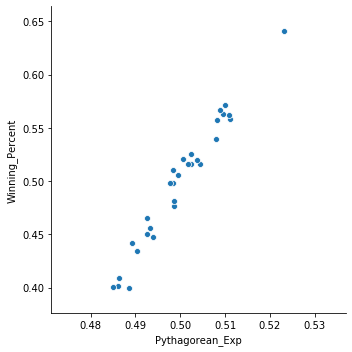

In [13]:
# Visualizing a scatter plot between winning percentage and pythagorean expectation

sns.relplot(x = 'Pythagorean_Exp', y = 'Winning_Percent', data = NBA_Games)

In [14]:
# Constructing a linear regression model

pyth_lm = smf.ols(formula = 'Winning_Percent ~ Pythagorean_Exp', data = NBA_Games).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Winning_Percent   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     762.6
Date:                Thu, 19 May 2022   Prob (F-statistic):           7.42e-22
Time:                        11:23:46   Log-Likelihood:                 92.747
No. Observations:                  30   AIC:                            -181.5
Df Residuals:                      28   BIC:                            -178.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7249      0.117    -23.342      0.000      -2.964      -2.486
Pythagorean_Exp     6.4495      0.234     27.615      0.000       5.971       6.928
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.421
Skew:                          -0.169   Prob(JB):                        0.810
Kurtosis:                       2.528   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

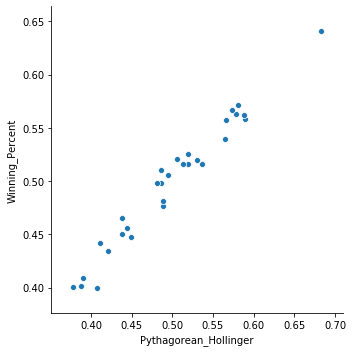

In [15]:
# Visualizing a scatter plot between winning percentage and pythagorean expectation

sns.relplot(x = 'Pythagorean_Hollinger', y = 'Winning_Percent', data = NBA_Games)

In [16]:
# Constructing a linear regression model

pyth_lm = smf.ols(formula = 'Winning_Percent ~ Pythagorean_Hollinger', data = NBA_Games).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Winning_Percent   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     771.7
Date:                Thu, 19 May 2022   Prob (F-statistic):           6.32e-22
Time:                        11:23:46   Log-Likelihood:                 92.918
No. Observations:                  30   AIC:                            -181.8
Df Residuals:                      28   BIC:                            -179.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1016      0.014      7.036      0.000       0.072       0.131
Pythagorean_Hollinger     0.7969      0.029     27.780      0.000       0.738       0.856
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.375
Skew:                          -0.153   Prob(JB):                        0.829
Kurtosis:                       2.546   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""